#  Adaline 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
df = pd.read_csv('iris.data.csv', header=None)
df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

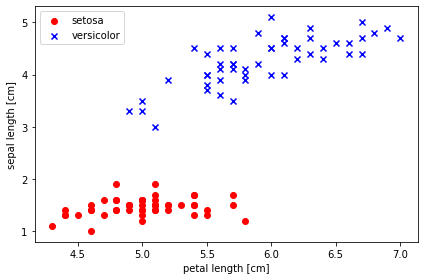

In [3]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# # plt.savefig('./iris_1.png', dpi=300)
plt.show()

In [4]:
class AdalineGD(object):
  
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta # Step value 0.0001 
        self.n_iter = n_iter # number of iterations n=10
        self.random_state = random_state 
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1+X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output) # y [1,-1,1.......] 
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
       # print(X.shape)
       # print(self.w_)
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Text(0, 0.5, 'log(Sum-squared-error)')

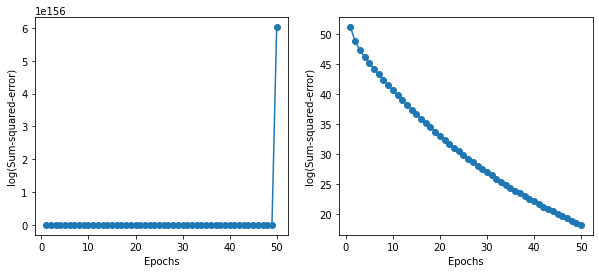

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=50, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')

In [6]:
def plot_dec_reg(X,y,classifier,resolution = 0.02):
    marker = ('s','o')
    colors = ('red','blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    xx1 ,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
   
   
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  
    Z= Z.reshape(xx1.shape)
  
    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap = cmap)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    for i,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],c=colors[i],marker=marker[i],label=cl)

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() # x-mean/ deviation
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdalineGD(n_iter=50, eta=0.0001)
ada.fit(X,y)

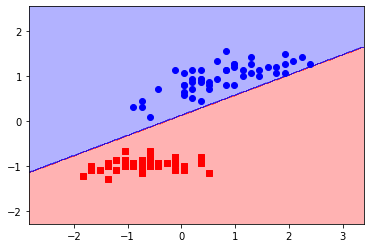

In [8]:
plot_dec_reg(X_std,y,classifier=ada)